In [0]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy as np

import io
import matplotlib.pyplot as plt
import os
import pandas as pd 
  
# loading the iris dataset 
trainData = pd.read_csv("/Users/ismaelvillanuevamiranda/DATOS/DATOS/depressionData/trainData/noFeatures/trainData.binary")
testData = pd.read_csv("/Users/ismaelvillanuevamiranda/DATOS/DATOS/depressionData/testData/noFeatures/testData.binary")


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


In [0]:
#df = pd.read_csv('/Users/ismaelvillanuevamiranda/DATOS/DATOS/Fall2018/SLP/depressionData/trainData/noFeatures/trainData.binary')
trainData.head()

In [0]:
trainData.corr()

In [0]:
trainData.isnull().sum()

In [0]:
print("Total number of labels: {}".format(trainData.shape[0]))
print("Number of No Depressed: {}".format(trainData[trainData.label == 0].shape[0]))
print("Number of Depressed: {}".format(trainData[trainData.label == 1].shape[0]))

Total number of labels: 107
Number of No Depressed: 77
Number of Depressed: 30


In [0]:
X_train=trainData.iloc[:, :-1]
X_train.head()
print(X_train.shape)
from sklearn.preprocessing import LabelEncoder
y_train=trainData.iloc[:,-1]

trainEncoder = LabelEncoder()
y_train = trainEncoder.fit_transform(y_train)

print(y_train)




X_test=testData.iloc[:, :-1]
X_test.head()
print(X_test.shape)
from sklearn.preprocessing import LabelEncoder
y_test=testData.iloc[:,-1]

testEncoder = LabelEncoder()
y_test = testEncoder.fit_transform(y_test)

print(y_test)



In [0]:
# Scaling the data to be between -1 and 1
#Trainin data
print(X_train)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train)

#Testing
print(X_test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
print(X_test)

In [0]:
#Default hyperparameters
from sklearn.svm import SVC
from sklearn import metrics
from pprint import pprint
from sklearn.metrics import f1_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# pprint(svc.get_params())
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
print('F1:')
print(metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print('Precision:')
print(metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print('Recall:')
print(metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print('Mean squared error:')
print(metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error:')
print(metrics.mean_absolute_error(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

In [0]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
#pprint(svc.get_params())
print('Accuracy Score:')
print(metrics.accuracy_score(y_pred,y_test))
print('Mean squared error:')
print(metrics.mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

In [0]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# pprint(svc.get_params())

print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

In [0]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# pprint(svc.get_params())
print('Accuracy Score:')
print(metrics.accuracy_score(y_pred,y_test))
print('Mean squared error:')
print(metrics.mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print(y_test)
print(y_pred)

In [0]:
#Performing K-fold cross validation with different kernels
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())


In [0]:
#
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

In [0]:
#CV on Polynomial kernel
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())


In [0]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

Text(0,0.5,'Cross-Validated Accuracy')

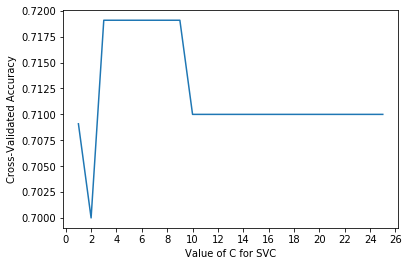

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

Text(0,0.5,'Cross-Validated Accuracy')

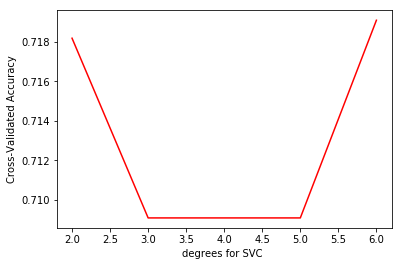

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
from sklearn.svm import SVC
svm_model= SVC()

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
from sklearn.grid_search import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

In [0]:
print(model_svm.best_params_)

In [0]:
y_pred= model_svm.predict(X_test)
print("Accuracy:")
print(metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Mean absolute error:")
print(metrics.mean_absolute_error(y_test, y_pred))
#print(classification_report(y_pred, y_test))